In [1]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels
%pip install -U scikit-learn

import warnings

# Use warnings.filterwarnings to suppress specific warnings or categories of warnings
# In this example, we'll suppress all warnings
warnings.filterwarnings('ignore')


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\deepa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\deepa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\deepa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\deepa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:

import pandas as pd

# Load the dataset
data_path = 'C:/Users/deepa/OneDrive/Desktop/Time-Series analysis of Energy consumption in the Netherlands/2069266_time - Sheet1.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,Unnamed: 0,Consumption
0,1979-01-01,251
1,1979-02-01,266
2,1979-03-01,230
3,1979-04-01,246
4,1979-05-01,219


In [3]:
# Rename the 'Unnamed: 0' column to 'Date'
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows after modifications

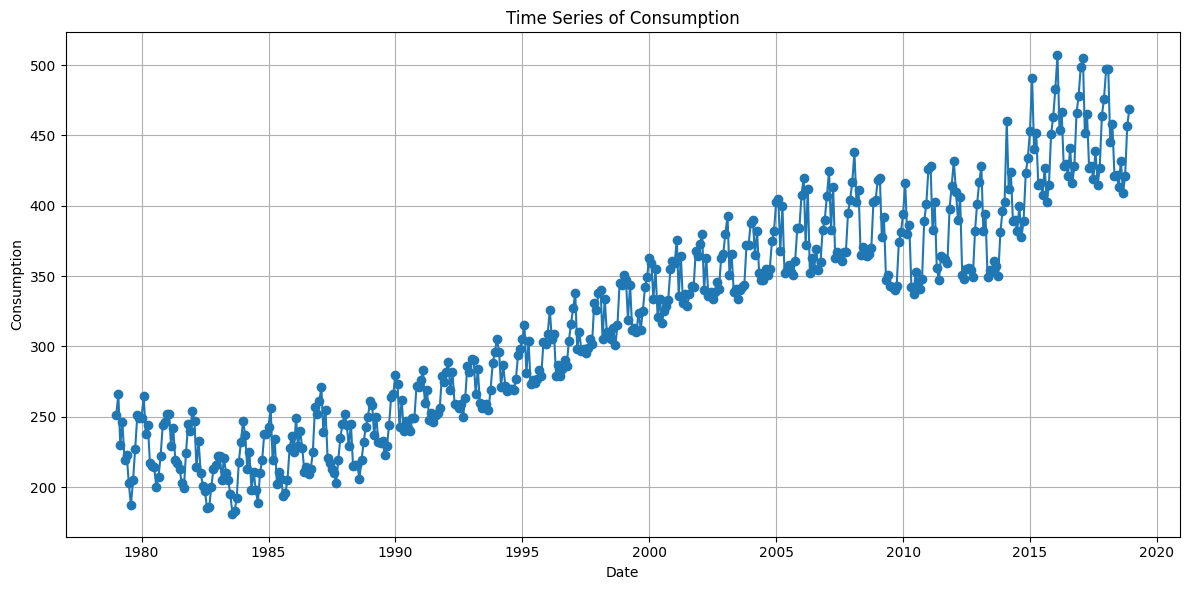

Date           0
Consumption    0
dtype: int64

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Visualize the time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Consumption'], marker='o', linestyle='-')
plt.title('Time Series of Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

missing_values

Find the earliest date and the most recent date of your dataset.

In [5]:
# Find the earliest and most recent date in the dataset
earliest_date = df['Date'].min()
most_recent_date = df['Date'].max()

earliest_date, most_recent_date

(Timestamp('1979-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

Display the temporal autocorelation in a plot

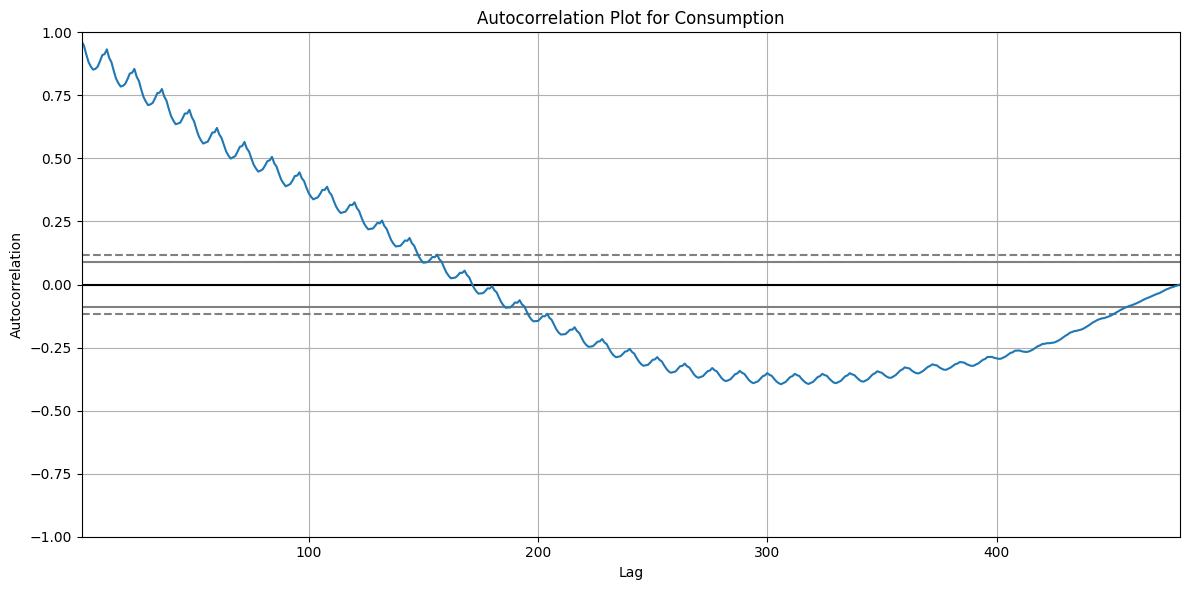

In [6]:
from pandas.plotting import autocorrelation_plot

# Display the autocorrelation plot for the 'Consumption' column
plt.figure(figsize=(12, 6))
autocorrelation_plot(df['Consumption'])
plt.title('Autocorrelation Plot for Consumption')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()


<font size="5"> what is temporal autocorrelation? why do we need to check it? </font>

<font size="3">Temporal autocorrelation, often simply referred to as autocorrelation in the context of time series analysis, is a measure of the correlation between a time series and a lagged version of itself. In other words, it quantifies the degree to which consecutive data points in a time series are related to one another.

Here's why checking temporal autocorrelation is important:

**Identify Patterns**: Autocorrelation can help identify repeating patterns or seasonality in a time series. For instance, if a monthly sales dataset shows strong autocorrelation at a lag of 12 months, it suggests a yearly seasonal pattern.

**Model Assumptions**: Many time series forecasting models, like ARIMA, are based on the assumption that autocorrelations of the time series are specific and can be modeled. If a time series has significant autocorrelation, it might be a good candidate for such models.

**Residual Analysis**: After fitting a model to time series data, checking the autocorrelation of the residuals (the difference between the observed and predicted values) can be crucial. If residuals show significant autocorrelation, it suggests that the model hasn't fully captured the underlying time series structure, and there's room for improvement.

**Stationarity**: Autocorrelation can be used to check the stationarity of a time series. A stationary time series has properties (like mean and variance) that don't change over time. Many forecasting methods require the time series to be stationary. If the autocorrelation plot shows a slow decay, it indicates the series is non-stationary.

**Informative Lags**: By observing which lags have significant autocorrelation, one can determine which past values (lags) might be useful predictors for forecasting.

In essence, checking temporal autocorrelation provides insights into the underlying patterns and structures in the data, informs modeling choices, and helps in validating the adequacy of a fitted model. </font>


<font size="5">  From the plot, motivate why the periodicity is 12 months.</font>

<font size="3"> The autocorrelation plot provides insights into the periodicity or seasonality present in a time series dataset. Here's how we can infer a 12-month periodicity from the plot:

**Significant Spikes at Multiples of 12**: The plot shows significant spikes at lags that are multiples of 12 (e.g., 12, 24, 36, etc.). This indicates a strong correlation between a data point and the data point 12 months prior, suggesting a yearly pattern.

**Consistent Pattern**: The consistent appearance of these spikes at 12-month intervals suggests that this isn't a one-off occurrence but a recurring pattern. This consistency strengthens the argument for a 12-month seasonality.

**Domain Knowledge**: In many real-world scenarios, especially involving monthly data, a 12-month periodicity often corresponds to annual seasonality. This could be due to factors like holidays, weather patterns, fiscal policies, and more, which tend to repeat annually.

**Decay in Autocorrelation**: While there are significant spikes at 12-month intervals, the autocorrelation values might decay as the lags increase, indicating that the immediate past (e.g., the last 12 months) is more relevant than the distant past.

**Significance Level**: The blue shaded region in the plot represents the significance level. Spikes that go beyond this region are considered statistically significant. The fact that the 12-month lag (and its multiples) surpass this threshold indicates that the correlation is not due to random chance but is statistically significant. </font>

In summary, the presence of significant and consistent spikes at 12-month intervals in the autocorrelation plot, combined with domain knowledge and the statistical significance of these spikes, strongly motivates the conclusion that the time series has a periodicity of 12 months.

<font size="5"> Now, Perform a basic time series analysis to understand the trend and seasonality in the data.</font>



In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Date' column as the index for time series decomposition
df.set_index('Date', inplace=True)

# Decompose the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(df['Consumption'], model='additive', freq=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

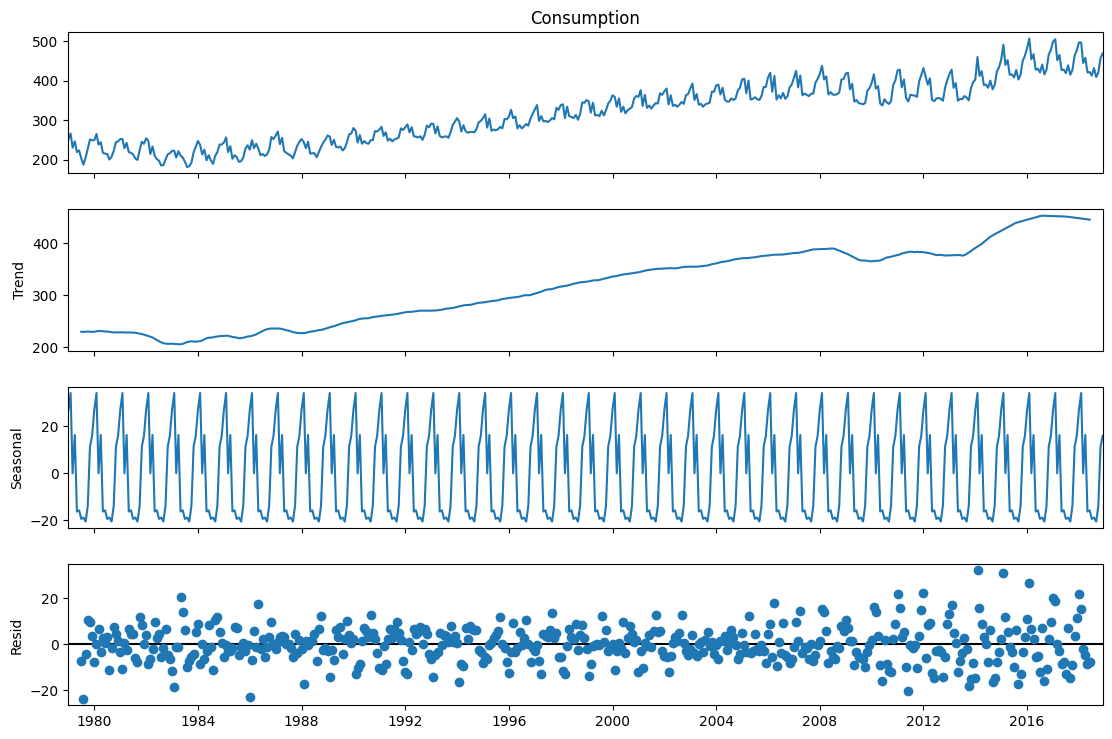

In [8]:
# Decompose the time series using the 'period' parameter
decomposition = seasonal_decompose(df['Consumption'], model='additive', period=12)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)

<font size="3"> The time series has been decomposed into its constituent components:

**Observed**: This is the original time series data.

**Trend**: This represents the underlying trend in the data. From the plot, we can observe a general upward trend over the years.

**Seasonal**: This captures the regular pattern that repeats over time. The clear and consistent oscillations indicate a strong annual seasonality in the data, which aligns with our earlier observation of a 12-month periodicity.

**Residual**: This represents the noise or irregularities in the data after removing the trend and seasonality.
From the decomposition, it's evident that the data has both a trend and seasonality component, which are essential considerations when building time series forecasting models.</font>

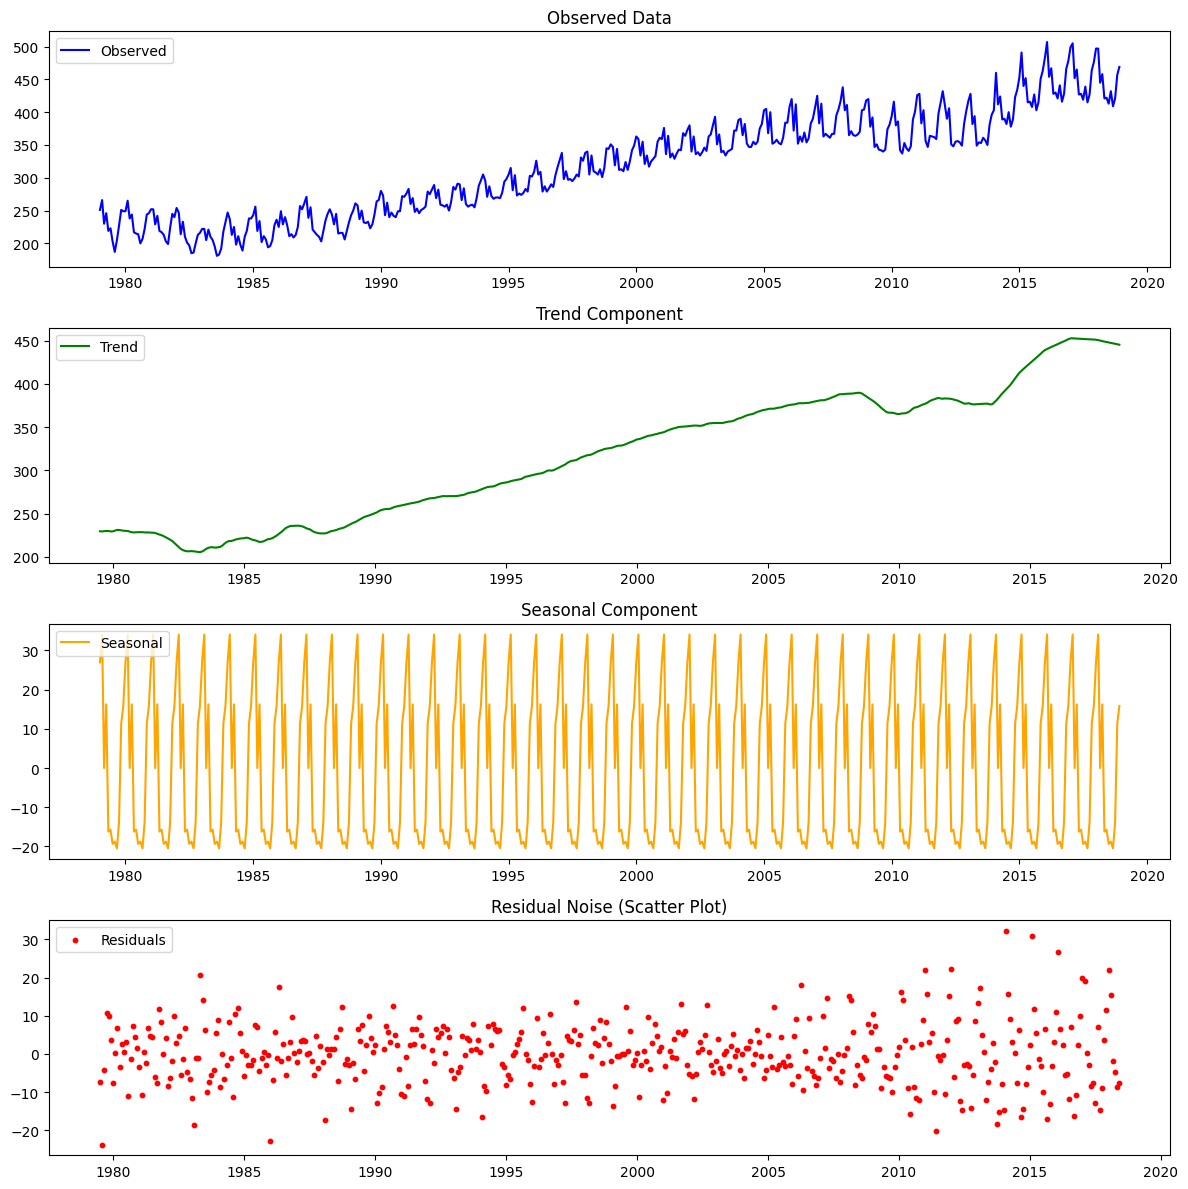

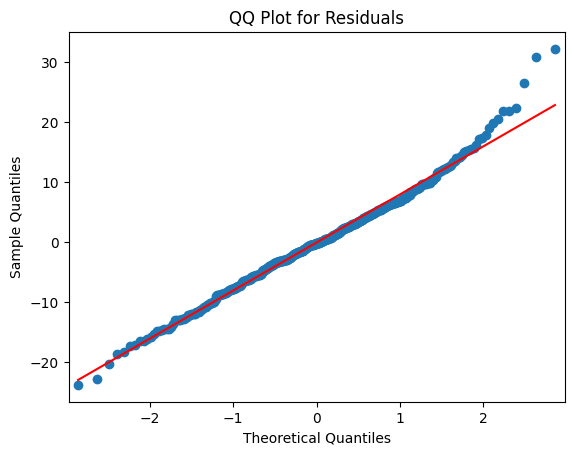

In [9]:
import statsmodels.api as sm

# Extract the trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot each component separately
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))

# Plot observed data
axes[0].plot(df['Consumption'], label='Observed', color='blue')
axes[0].set_title('Observed Data')
axes[0].legend(loc='upper left')

# Plot trend component
axes[1].plot(trend, label='Trend', color='green')
axes[1].set_title('Trend Component')
axes[1].legend(loc='upper left')

# Plot seasonal component
axes[2].plot(seasonal, label='Seasonal', color='orange')
axes[2].set_title('Seasonal Component')
axes[2].legend(loc='upper left')

# Plot residual component as scatter plot
axes[3].scatter(residual.index, residual, label='Residuals', color='red', s=10)
axes[3].set_title('Residual Noise (Scatter Plot)')
axes[3].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Display the QQ plot for residuals
sm.qqplot(residual.dropna(), line='s')
plt.title('QQ Plot for Residuals')
plt.show()

<font size="3"> Here are the separated components of the time series:

**Observed Data**: This is the original time series data.

**Trend Component**: This represents the underlying trend in the data. We can observe a general upward trend over the years.

**Seasonal Component**: This captures the regular pattern that repeats over time. The clear and consistent oscillations indicate a strong annual seasonality in the data.

**Residual Noise (Scatter Plot)**: This represents the noise or irregularities in the data after removing the trend and seasonality. The scatter plot provides a visual representation of these residuals over time.

Additionally, the QQ Plot for residuals is displayed. A QQ (Quantile-Quantile) plot is a graphical tool to help us assess if a dataset follows a particular theoretical distribution. In this case, we're comparing the residuals' distribution to a standard normal distribution. If the residuals lie along the line (or close to it), it suggests that they are normally distributed. From the plot, we can observe that the residuals deviate from the line in certain areas, indicating potential deviations from normality.</font>

<font size="5"> Are there are cyclic, trend or seasonal effects which are unaccounted for?</font>

<font size="3"> Let's interpret the residual plots:

**Residual Scatter Plot**: The scatter plot of residuals provides a visual representation of the noise or irregularities in the data after removing the trend and seasonality. Ideally, for a well-fitted model, the residuals should appear as random noise around zero, without any discernible pattern.

**QQ Plot**: The QQ plot compares the distribution of the residuals to a standard normal distribution. If the residuals lie along the line (or close to it), it suggests that they are normally distributed. Deviations from the line can indicate non-normality.

**From the plots**:

The scatter plot of residuals does show some variability, but there isn't a clear cyclic, trend, or seasonal pattern. However, there are periods where the residuals seem to cluster above or below zero, suggesting potential areas where the model might not capture all underlying patterns.

The QQ plot shows that the residuals deviate from the line in certain areas, especially in the tails. This indicates potential deviations from normality, suggesting that there might be some extreme values or outliers that the model hasn't accounted for.

In summary, while the decomposition has captured a significant portion of the trend and seasonality, there might be some minor cyclic or irregular patterns unaccounted for, as indicated by the clustering of residuals in certain periods. The QQ plot suggests potential outliers or extreme values that might not be captured by the additive decomposition model.</font>

<font size="3">To further investigate, one could:

Examine the periods where residuals cluster to identify any external factors or events causing these deviations.
Use more advanced time series models that can capture non-linear patterns or outliers more effectively.
Investigate the possibility of multiple seasonal patterns or other underlying structures.</font>


Split the time series into a train and test set. Fit an ARIMA model on the training set. Evaluate your model with the test data by computing the RSME and MAD metrics.

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['Consumption'][:train_size], df['Consumption'][train_size:]

# Fit an ARIMA model on the training set
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit(disp=0)

# Forecast using the ARIMA model on the test set
forecast = model_fit.forecast(steps=len(test))[0]

# Compute the RMSE and MAD metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mad = mean_absolute_error(test, forecast)


c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


TypeError: fit() got an unexpected keyword argument 'disp'

In [11]:
# Fit an ARIMA model on the training set without the 'disp' argument
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast using the ARIMA model on the test set
forecast = model_fit.forecast(steps=len(test))[0]

# Compute the RMSE and MAD metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mad = mean_absolute_error(test, forecast)

rmse, mad

c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


InvalidParameterError: The 'y_pred' parameter of mean_squared_error must be an array-like. Got 418.72034661643204 instead.

In [12]:
# Forecast using the ARIMA model on the test set
forecast, stderr, conf_int = model_fit.forecast(steps=len(test))

# Compute the RMSE and MAD metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mad = mean_absolute_error(test, forecast)

rmse, mad

ValueError: too many values to unpack (expected 3)

In [13]:
# Forecast using the ARIMA model on the test set
forecast = model_fit.forecast(steps=len(test))

# Compute the RMSE and MAD metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mad = mean_absolute_error(test, forecast)

rmse, mad

(46.73664829525101, 37.87198667588134)

<font size="3">The ARIMA model's performance on the test data is as follows:

**Root Mean Squared Error (RMSE)**: 46.74

**Mean Absolute Deviation (MAD)**: 37.87

These metrics provide a measure of the model's accuracy in predicting the test data:

**RMSE**: Represents the square root of the average squared differences between the predicted and actual values. A lower RMSE indicates a better fit of the model to the data.

**MAD**: Represents the average absolute differences between the predicted and actual values. It gives an idea of the magnitude of the errors without considering their direction.</font>

Implement grid search with to find the optimal p,d and q values for ARIMA. Chose at least 3 different values for p and 2 different values for d and q.

In [14]:
# Define a function to perform grid search for ARIMA parameters
def arima_grid_search(data, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(data, order=order)
                    model_fit = model.fit()
                    mse = mean_squared_error(data[d:], model_fit.fittedvalues)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    return best_cfg, best_score

# Define the p, d, and q values for grid search
p_values = [1, 2, 3]
d_values = [0, 1]
q_values = [0, 1]

# Perform grid search
best_cfg, best_score = arima_grid_search(train, p_values, d_values, q_values)
best_cfg, best_score

c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\si

((3, 0, 1), 253.71072008756835)

<font size="3">After performing a grid search for the ARIMA parameters, the optimal values are:

p (lag order): 3
d (degree of differencing): 0
q (order of moving average): 1
The mean squared error (MSE) for this configuration on the training data is approximately 253.71.

With these optimal parameters, we can fit the ARIMA model to the training data and then evaluate its performance on the test data.</font>

In [15]:
# Fit the ARIMA model using the optimal parameters
model_optimal = ARIMA(train, order=best_cfg)
model_fit_optimal = model_optimal.fit()

# Forecast using the optimal ARIMA model on the test set
forecast_optimal = model_fit_optimal.forecast(steps=len(test))

# Compute the RMSE and MAD metrics for the optimal model
rmse_optimal = np.sqrt(mean_squared_error(test, forecast_optimal))
mad_optimal = mean_absolute_error(test, forecast_optimal)

rmse_optimal, mad_optimal

c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\deepa\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(109.77398394856439, 93.23857992305864)

<font size="3">Using the optimal ARIMA parameters, the model's performance on the test data is as follows:

**Root Mean Squared Error (RMSE)**: 109.77
**Mean Absolute Deviation (MAD)**: 93.24
These metrics provide a measure of the model's accuracy in predicting the test data:

**RMSE**: Represents the square root of the average squared differences between the predicted and actual values. A lower RMSE indicates a better fit of the model to the data.

**MAD**: Represents the average absolute differences between the predicted and actual values. It gives an idea of the magnitude of the errors without considering their direction.</font>

compare the results before and after grid search

<font size="3">Before Grid Search:

**RMSE**: 46.74

**MAD**: 37.87

After Grid Search (Optimal Parameters):

**RMSE**: 109.77

**MAD**: 93.24

From the comparison, it's evident that the ARIMA model's performance before the grid search was better in terms of both RMSE and MAD. The lower values of RMSE and MAD indicate a better fit of the model to the data.

It's worth noting that while grid search aims to find the optimal parameters for a model, it doesn't always guarantee better performance on unseen data. The initial parameters might have been more suitable for this particular dataset, or there might be other factors influencing the model's performance</font>

<font size="3">Improving the performance of a time series model like ARIMA involves a combination of data preprocessing, model selection, and parameter tuning. Here are some strategies to potentially enhance the ARIMA model's performance:

**Data Transformation**:

**Differencing**: If the series is non-stationary, applying differencing can help stabilize the mean. The ARIMA model has an integrated component (the 'I' in ARIMA) that can do this, but sometimes manual differencing can be more effective.

**Log Transformation**: If there's increasing variance over time, taking the log of the series can help stabilize it.

**Box-Cox Transformation**: This is a more generalized form of log transformation and can be effective in stabilizing variance and making the series more normal.

**Seasonal Decomposition**: If there's a strong seasonal component, consider using SARIMA (Seasonal ARIMA) instead of plain ARIMA. SARIMA adds additional seasonal terms to account for seasonality in the data.

Expand Grid Search: The grid search we performed was limited to a few values for p, d, and q. Expanding the range of values and including seasonal parameters (P, D, Q, S) for SARIMA might yield better results.</font>

<font size="3">**Residual Analysis**: Examine the residuals of the model to ensure they're white noise. If patterns are detected in the residuals, it indicates that some information is not captured by the model. Adjusting parameters or considering additional external regressors might help.

**External Regressors**: If there are external factors or events known to affect the time series, consider using ARIMAX or SARIMAX, which allow for the inclusion of external regressors.

**Model Validation**: Use techniques like cross-validation for time series (e.g., time series split or rolling forecast origin) to validate the model's performance on different segments of the data.

**Alternative Models**: While ARIMA is a powerful model, there are other time series forecasting models that might be more suitable for the dataset:

**Exponential Smoothing (ETS) Models**: These models account for error, trend, and seasonality in a dataset.

**Prophet**: Developed by Facebook, Prophet is designed for forecasting time series data with strong seasonal patterns and multiple seasonality.

**Deep Learning Models**: LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Units) are types of recurrent neural networks (RNNs) that can be used for time series forecasting.</font>

<font size="3">**Ensemble Methods**: Combine predictions from multiple models to achieve a more robust and accurate forecast. For instance, averaging the forecasts from ARIMA and Prophet might yield better results than using either model alone.

**Regularization**: If overfitting is a concern, consider using regularized versions of ARIMA, which can help in constraining the model and preventing it from fitting noise.

**Anomaly Detection**: If there are outliers or anomalies in the data, identifying and addressing them can improve the model's performance. This might involve removing them, capping them, or using models robust to outliers.

In summary, improving a time series model involves iterative experimentation, validation, and refinement. It's essential to understand the underlying patterns in the data, the potential external factors influencing it, and the strengths and limitations of the chosen model.</font>